In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re

In [5]:
data = pd.read_csv('./mydata/simulation.csv')

In [7]:
data['qoe'] = data['Latency'] + data['Jerkiness'] + data['Sync']

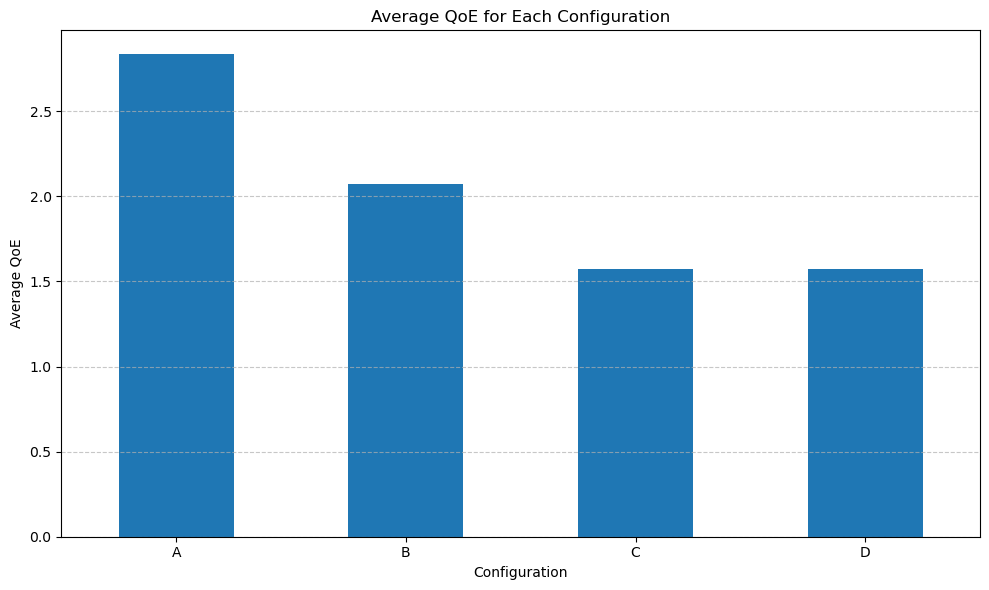

In [9]:
import matplotlib.pyplot as plt

# Group by Config and calculate the average QoE
average_qoe = data.groupby('Config')['Jerkiness'].mean().sort_index()

# Plot the average QoE for each configuration
plt.figure(figsize=(10, 6))
average_qoe.plot(kind='bar', rot=0)
plt.title('Average QoE for Each Configuration')
plt.xlabel('Configuration')
plt.ylabel('Average QoE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [31]:
fields = ['episode', 'reward', 'ep_block_prob', 'ep_accepted_requests', 'avg_deployment_cost',
                  'avg_total_latency', 'avg_access_latency', 'avg_proc_latency',
                  'avg_throuput_in', 'avg_packetsize_in', 'avg_interarrival_in', 'avg_throuput_out','avg_packetsize_out','avg_interarrival_out','avg_qoe','gini',
                  'execution_time']

## Copare mean during training and testing

In [ ]:
# Directory paths for training and testing logs
train_dir = './run_metrics'
test_dir = './run_metrics_test'

# Metric columns to calculate means
metric_columns = ['avg_qoe', 'gini', 'avg_total_latency', 'avg_deployment_cost', 'ep_accepted_requests']

# Listing training and testing files
train_files = set(sorted([f for f in os.listdir(train_dir) if f.endswith('.csv')]))
test_files = set(sorted([f for f in os.listdir(test_dir) if f.endswith('.csv')]))
names = list(train_files.intersection(test_files))

for file_name in names:
    # Match the pattern against the file name
    name = file_name.replace('.csv.csv', '')
    match = re.match(pattern, name)
    # Extract variables
    if match:
        variables = match.groupdict()
        train_file = train_dir + '/' + file_name
        test_file = test_dir + '/' + file_name
        # Ensure files match by name
        #assert train_file == test_file, f"File mismatch: {train_file} != {test_file}"
        
        # Load training and testing data
        df_train = pd.read_csv( train_file, on_bad_lines='skip')
        df_test = pd.read_csv( test_file, on_bad_lines='skip')
    
        # Calculate means for metrics
        train_means = df_train[metric_columns].mean()
        test_means = df_test[metric_columns].mean()

        
        train_dic = train_means.to_dict()
        # TODO : add train to the begining of the keys 
        test_dic = test_dic.to_dict()
        # TODO : add test to the begining of the keys 
        # TODO : join this with variables dictionary
        # TODO : add to a list
        # TODO : convert the list to a dataframe

In [110]:
import os
import re
import pandas as pd

# Directory paths for training and testing logs
train_dir = './run_metrics'
test_dir = './run_metrics_test'

# Metric columns to calculate means
metric_columns = ['avg_qoe', 'gini', 'avg_total_latency', 'avg_deployment_cost', 'ep_accepted_requests']

# Listing training and testing files
train_files = set(sorted([f for f in os.listdir(train_dir) if f.endswith('.csv')]))
test_files = set(sorted([f for f in os.listdir(test_dir) if f.endswith('.csv')]))
names = list(train_files.intersection(test_files))

# Pattern to extract variables from the filename
pattern = r"(?P<alg>.+)_env_(?P<env_name>.+)_qoe_(?P<qoe_included>.+)_obj_(?P<obj_included>.+)_cw_(?P<cost_weight>.+)_qw_(?P<qoe_weight>.+)_lw_(?P<latency_weight>.+)_gw_(?P<gini_weight>.+)_sim_(?P<qoe_simulation_mode>.+)_acc_(?P<qoe_accuracy>.+)"

# List to hold all results
results = []

for file_name in names:
    # Match the pattern against the file name
    name = file_name.replace('.csv.csv', '')
    match = re.match(pattern, name)
    
    if match:
        # Extract variables
        variables = match.groupdict()
        train_file = os.path.join(train_dir, file_name)
        test_file = os.path.join(test_dir, file_name)
        
        # Load training and testing data
        df_train = pd.read_csv(train_file, on_bad_lines='skip')
        df_test = pd.read_csv(test_file, on_bad_lines='skip')
    
        # Calculate means for metrics
        train_means = df_train[metric_columns].mean()
        test_means = df_test[metric_columns].mean()
        
        # Convert means to dictionaries and add prefixes to keys
        train_dic = {f"train_{k}": v for k, v in train_means.to_dict().items()}
        test_dic = {f"test_{k}": v for k, v in test_means.to_dict().items()}
        
        # Combine variables, train, and test dictionaries
        combined_result = {**variables, **train_dic, **test_dic}
        
        # Add the combined result to the results list
        results.append(combined_result)

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results)


In [112]:
results_df

,alg,env_name,qoe_included,obj_included,cost_weight,qoe_weight,latency_weight,gini_weight,qoe_simulation_mode,qoe_accuracy,train_avg_qoe,train_gini,train_avg_total_latency,train_avg_deployment_cost,train_ep_accepted_requests,test_avg_qoe,test_gini,test_avg_total_latency,test_avg_deployment_cost,test_ep_accepted_requests
0,mask_ppo,nne,True,False,0.0,0.0,0.0,1.0,Simulation,0.9,0.101470,0.524185,36.093184,19.767733,99.274539,0.1013,0.5176,34.6225,17.5263,99.50
1,mask_ppo,nne,True,False,0.0,1.0,0.0,0.0,Simulation,0.8,0.101475,0.548261,41.256796,19.166602,99.598904,0.1017,0.5341,37.7092,16.4218,99.54
2,mask_ppo,nne,True,False,0.0,0.0,0.0,1.0,Simulation,0.8,0.101390,0.538191,39.704878,19.237374,99.261086,0.1023,0.5379,36.2744,17.7133,99.41
3,mask_ppo,nne,True,False,0.0,0.0,1.0,0.0,Simulation,1.0,0.101505,0.518615,35.269108,19.203423,99.454908,0.1018,0.5012,34.9322,16.9440,99.53
4,mask_ppo,nne,True,False,0.0,0.5,0.5,0.0,Simulation,1.0,0.101360,0.522292,35.407509,19.597379,99.425012,0.1018,0.5126,34.8287,17.0557,99.51
5,mask_ppo,nne,True,False,0.5,0.0,0.0,0.5,Simulation,0.9,0.101470,0.589148,49.969895,12.849821,99.444444,0.1015,0.6208,56.1899,10.2485,99.51
6,mask_ppo,nne,True,False,0.0,0.5,0.0,0.5,Real,0.0,0.101604,0.530339,38.152262,18.848700,99.500249,0.1013,0.5407,42.8454,16.2742,99.53
7,mask_ppo,nne,True,False,0.5,0.0,0.5,0.0,Real,0.0,0.101584,0.540369,38.782476,16.041609,99.331340,0.1023,0.5414,39.6157,12.4194,99.52
8,mask_ppo,nne,True,False,0.0,0.5,0.0,0.5,Simulation,0.9,0.101525,0.529113,36.434833,19.123572,99.454908,0.1013,0.5212,36.0527,17.0139,99.53
9,mask_ppo,nne,True,False,0.5,0.5,0.0,0.0,Real,0.0,0.101789,0.569258,46.120429,15.956901,99.497260,0.1023,0.6236,54.0737,11.6762,99.53


In [50]:
# Regular expression pattern based on the format
pattern = (
    r"(?P<alg>.+)_env_(?P<env_name>.+)_qoe_(?P<qoe_included>.+)_obj_(?P<obj_included>.+)"
    r"_cw_(?P<cost_weight>.+)_qw_(?P<qoe_weight>.+)_lw_(?P<latency_weight>.+)"
    r"_gw_(?P<gini_weight>.+)_sim_(?P<qoe_simulation_mode>.+)_acc_(?P<qoe_accuracy>.+)"
)

{'alg': 'mask_ppo', 'env_name': 'nne', 'qoe_included': 'True', 'obj_included': 'False', 'cost_weight': '0.0', 'qoe_weight': '0.0', 'latency_weight': '0.5', 'gini_weight': '0.5', 'qoe_simulation_mode': 'Simulation', 'qoe_accuracy': '1.0.csv.csv'}


In [56]:
variables['alg']
variables['env_name']
variables['qoe_included']
variables['obj_included']
variables['cost_weight']
variables['latency_weight']
variables['gini_weight']
variables['qoe_weight']
variables['qoe_simulation_mode']
variables['qoe_accuracy']


'mask_ppo'

In [58]:
# Prepare data for line chart
line_data = {metric: {"Train": [], "Test": [], "Files": []} for metric in metric_columns}
file_name = file_name.replace('.csv.csv', '')


for name in names:
    # Match the pattern against the file name
    match = re.match(pattern, file_name)
    
    # Extract variables
    if match:
        variables = match.groupdict()
    
        train_file = train_dir + '/' + name
        test_file = test_dir + '/' + name
    
        # Load training and testing data
        df_train = pd.read_csv(train_file, on_bad_lines='skip')
        df_test = pd.read_csv(test_file, on_bad_lines='skip')
    
        # Calculate means for metrics
        train_means = df_train[metric_columns].mean()
        test_means = df_test[metric_columns].mean()
    
        # Collect data for plotting
        for metric in metric_columns:
            line_data[metric]["Train"].append(train_means[metric])
            line_data[metric]["Test"].append(test_means[metric])
            line_data[metric]["Files"].append(name)

In [60]:
variables

{'alg': 'mask_ppo',
 'env_name': 'nne',
 'qoe_included': 'True',
 'obj_included': 'False',
 'cost_weight': '0.0',
 'qoe_weight': '0.0',
 'latency_weight': '0.5',
 'gini_weight': '0.5',
 'qoe_simulation_mode': 'Simulation',
 'qoe_accuracy': '1.0'}

/tmp/ipykernel_26560/864993477.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


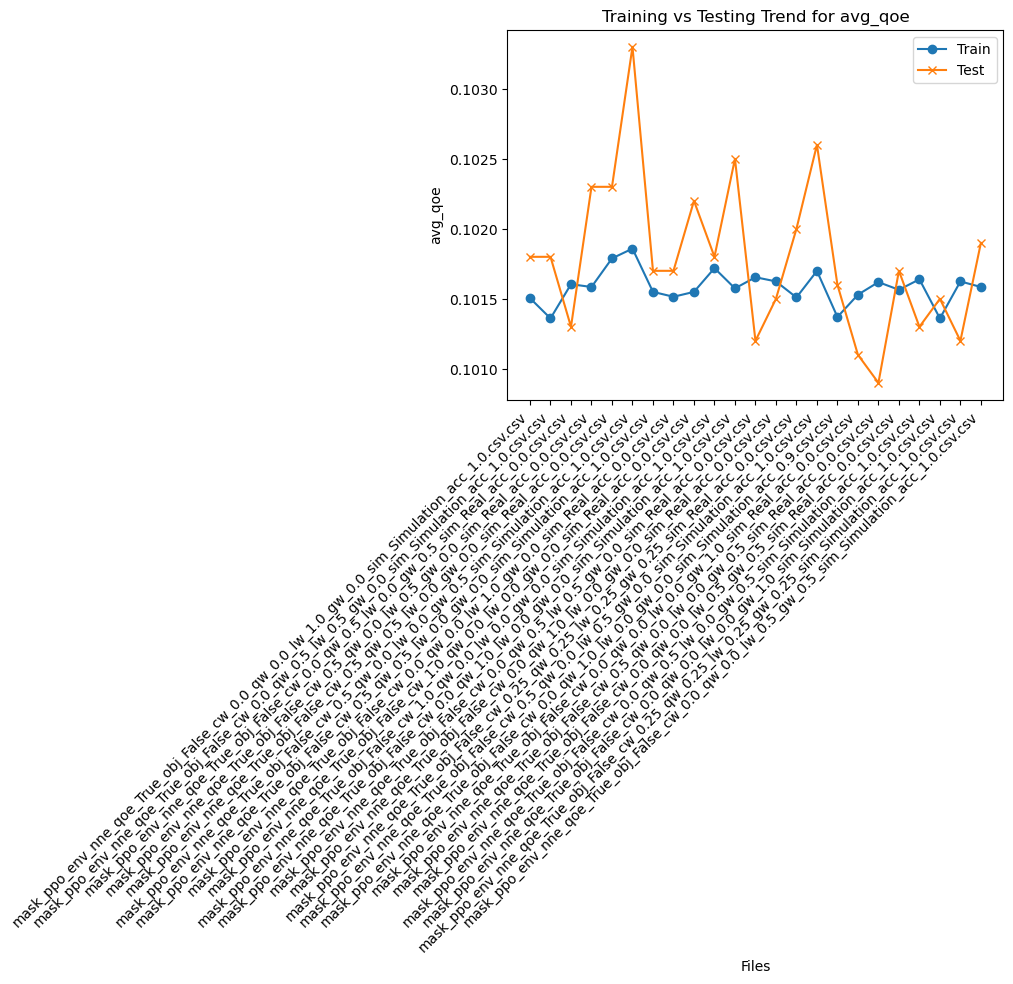

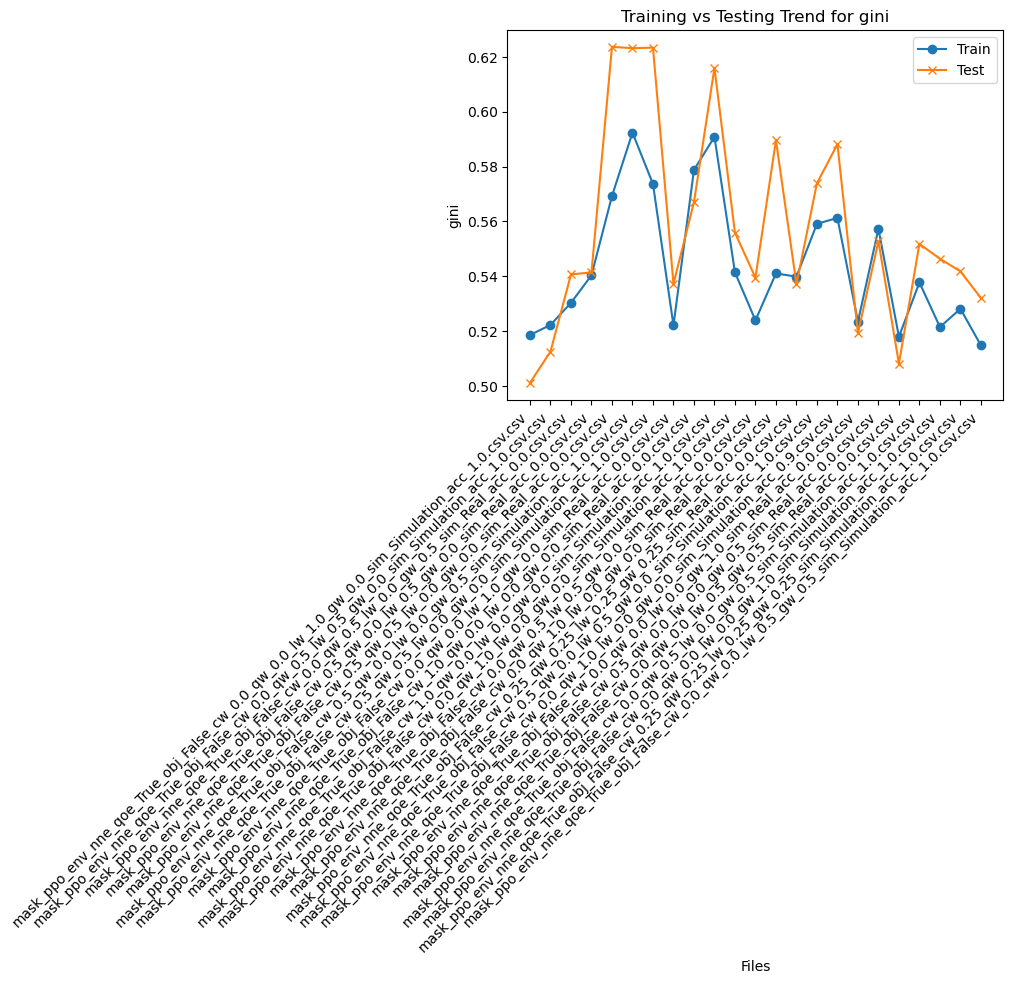

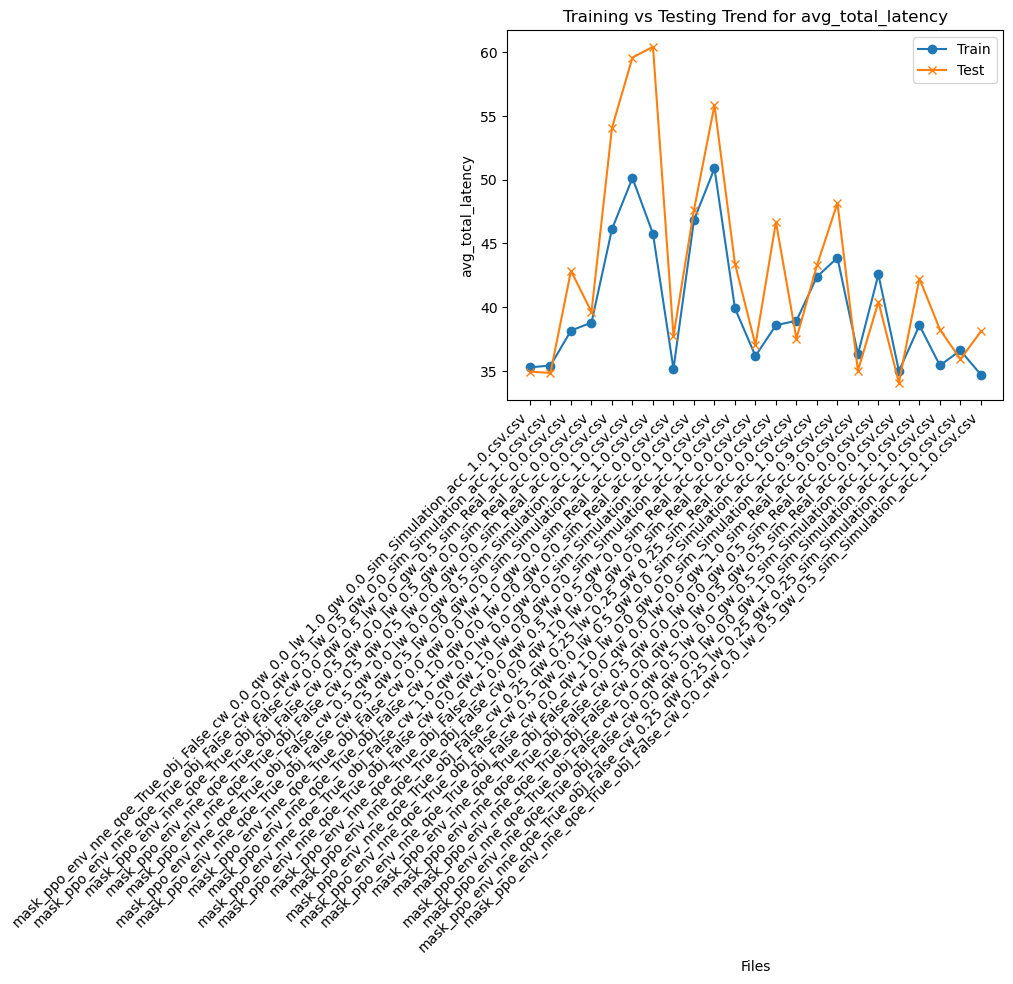

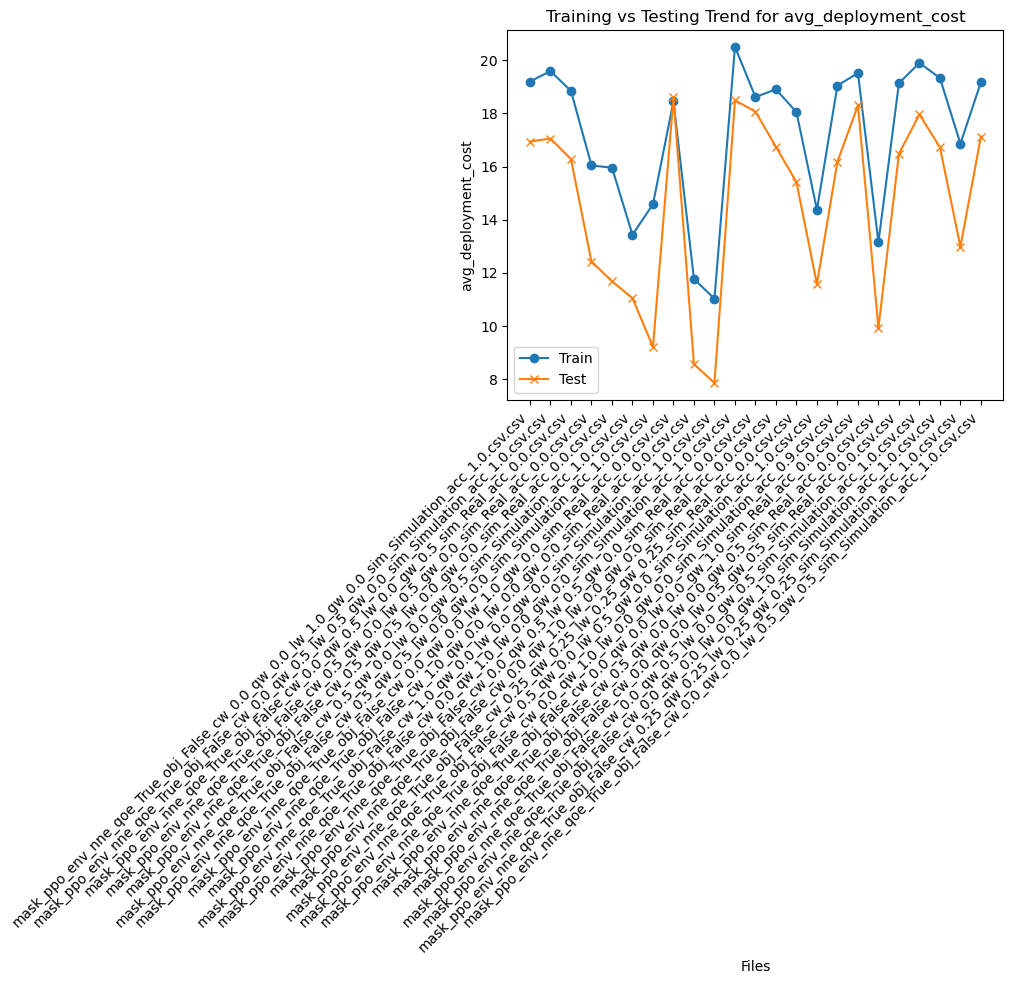

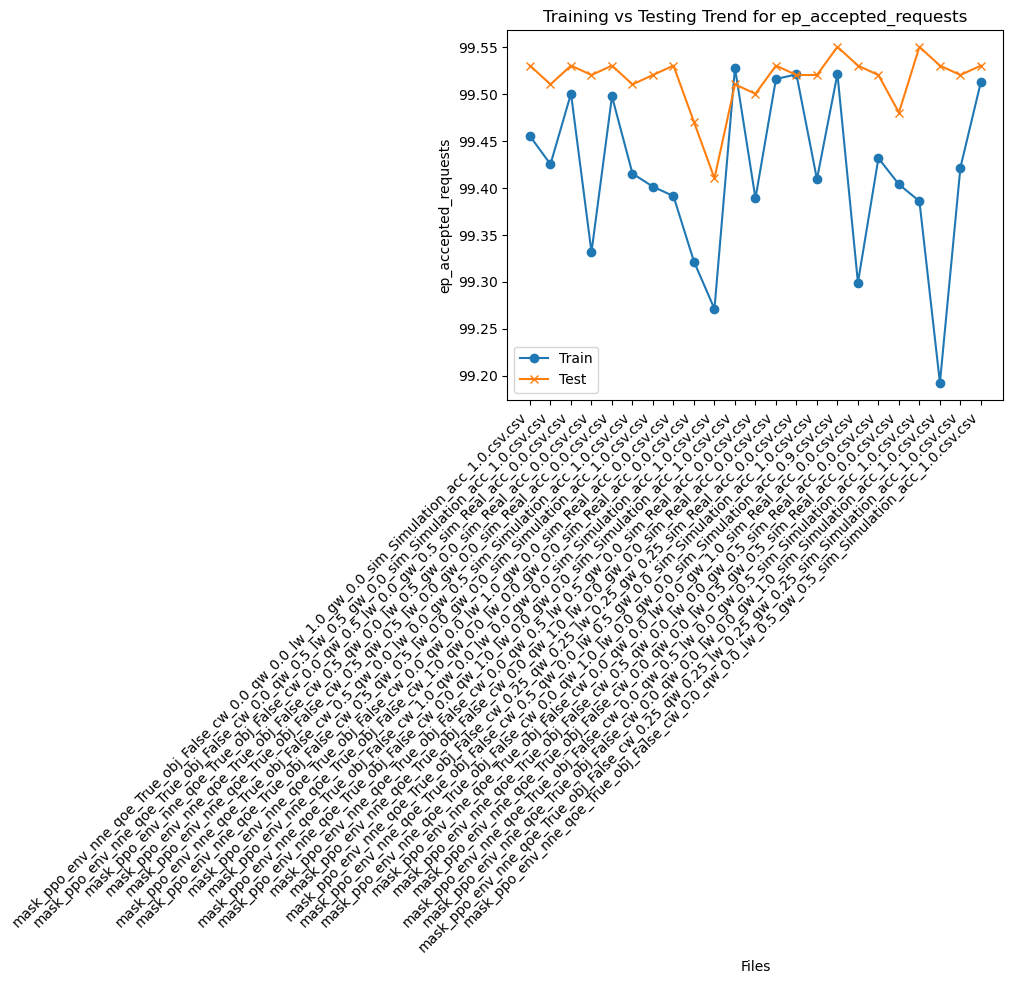

In [38]:
# Plot line chart for each metric
for metric, data in line_data.items():
    plt.figure()
    plt.plot(data["Files"], data["Train"], label='Train', marker='o')
    plt.plot(data["Files"], data["Test"], label='Test', marker='x')
    plt.title(f'Training vs Testing Trend for {metric}')
    plt.xlabel('Files')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

## Comparison based toward the cost efficiency 

# Comparison toward QoE improvement

In [42]:
data

{'Train': [99.45490782262083,
  99.42501245640258,
  99.50024912805182,
  99.33134030891878,
  99.49725959143,
  99.41504733432984,
  99.40109616342801,
  99.39113104135525,
  99.32137518684604,
  99.27105132037867,
  99.52765321375186,
  99.38863976083707,
  99.51569506726457,
  99.52067762830094,
  99.4090682610862,
  99.52117588440458,
  99.29895366218236,
  99.43148978574987,
  99.4035874439462,
  99.38565022421524,
  99.19232685600399,
  99.42152466367713,
  99.51270553064275],
 'Test': [99.53,
  99.51,
  99.53,
  99.52,
  99.53,
  99.51,
  99.52,
  99.53,
  99.47,
  99.41,
  99.51,
  99.5,
  99.53,
  99.52,
  99.52,
  99.55,
  99.53,
  99.52,
  99.48,
  99.55,
  99.53,
  99.52,
  99.53],
 'Files': ['mask_ppo_env_nne_qoe_True_obj_False_cw_0.0_qw_0.0_lw_1.0_gw_0.0_sim_Simulation_acc_1.0.csv.csv',
  'mask_ppo_env_nne_qoe_True_obj_False_cw_0.0_qw_0.5_lw_0.5_gw_0.0_sim_Simulation_acc_1.0.csv.csv',
  'mask_ppo_env_nne_qoe_True_obj_False_cw_0.0_qw_0.5_lw_0.0_gw_0.5_sim_Real_acc_0.0.csv.

In [5]:
import os
import re
import pandas as pd

# Directory paths for training and testing logs
train_dir = './run_metrics'
test_dir = './run_metrics_test'

# Metric columns to calculate means
metric_columns = ['avg_qoe', 'gini', 'avg_total_latency', 'avg_deployment_cost', 'ep_accepted_requests']

# Pattern to extract parameters
pattern = r"(?P<alg>.+)_env_(?P<env_name>.+)_qoe_(?P<qoe_included>.+)_obj_(?P<obj_included>.+)_cw_(?P<cost_weight>.+)_qw_(?P<qoe_weight>.+)_sim_(?P<qoe_simulation_mode>.+)_acc_(?P<qoe_accuracy>.+)"

# Listing training and testing files
train_files = set(sorted([f for f in os.listdir(train_dir) if f.endswith('.csv')]))
test_files = set(sorted([f for f in os.listdir(test_dir) if f.endswith('.csv')]))
names = list(train_files.intersection(test_files))

# Data to store results
comparison_data = []

# Process files
for name in names:
    match = re.match(pattern, name)
    if match:
        params = match.groupdict()
        qoe_included = params['qoe_included'] == "True"
        
        train_file = train_dir + '/' + name
        test_file = test_dir + '/' + name
        
        # Load training and testing data
        df_train = pd.read_csv(train_file, on_bad_lines='skip')
        df_test = pd.read_csv(test_file, on_bad_lines='skip')
        
        # Calculate means
        train_means = df_train[metric_columns].mean()
        test_means = df_test[metric_columns].mean()

        # Collect data for comparison
        comparison_data.append({
            "File": name,
            "qoe_included": qoe_included,
            **params,
            **{f"Train_{col}": train_means[col] for col in metric_columns},
            **{f"Test_{col}": test_means[col] for col in metric_columns},
        })

# Create a DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Compare metrics for `qoe_included` True vs False
comparison_grouped = comparison_df.groupby(['alg', 'env_name', 'obj_included', 'cost_weight', 'qoe_weight', 'qoe_simulation_mode', 'qoe_accuracy'])

# Calculate differences
results = []
for params, group in comparison_grouped:
    qoe_true = group[group['qoe_included'] == True]
    qoe_false = group[group['qoe_included'] == False]
    
    if not qoe_true.empty and not qoe_false.empty:
        diff = {col: (qoe_true.iloc[0][col] - qoe_false.iloc[0][col]) for col in metric_columns}
        results.append({
            **dict(zip(['alg', 'env_name', 'obj_included', 'cost_weight', 'qoe_weight', 'qoe_simulation_mode', 'qoe_accuracy'], params)),
            **diff
        })

# Create a DataFrame for differences
diff_df = pd.DataFrame(results)


In [7]:
qoe_true

,File,qoe_included,alg,env_name,obj_included,cost_weight,qoe_weight,qoe_simulation_mode,qoe_accuracy,Train_avg_qoe,Train_gini,Train_avg_total_latency,Train_avg_deployment_cost,Train_ep_accepted_requests,Test_avg_qoe,Test_gini,Test_avg_total_latency,Test_avg_deployment_cost,Test_ep_accepted_requests


In [9]:
qoe_false

,File,qoe_included,alg,env_name,obj_included,cost_weight,qoe_weight,qoe_simulation_mode,qoe_accuracy,Train_avg_qoe,Train_gini,Train_avg_total_latency,Train_avg_deployment_cost,Train_ep_accepted_requests,Test_avg_qoe,Test_gini,Test_avg_total_latency,Test_avg_deployment_cost,Test_ep_accepted_requests


# list the files  from run_metrics (for training log) and run_metrics_test (for test log)

# load file with the same name
# for example 
# df_train = pd.read_csv('./run_metrics/mask_ppo_env_nne_qoe_True_obj_False_cw_0.0_qw_0.0_lw_0.0_gw_1.0_sim_Real_acc_0.0.csv.csv', on_bad_lines='skip')
# df_test = pd.read_csv('./run_metrics_test/mask_ppo_env_nne_qoe_True_obj_False_cw_0.0_qw_0.0_lw_0.0_gw_1.0_sim_Real_acc_0.0.csv.csv', on_bad_lines='skip')

# cacluate the mean for ['avg_qoe','gini', 'avg_total_latency','avg_deployment_cost','ep_accepted_requests']

# compare these values means during test and training

In [12]:
df.columns

Index(['episode', 'reward', 'ep_block_prob', 'ep_accepted_requests',
       'avg_deployment_cost', 'avg_total_latency', 'avg_access_latency',
       'avg_proc_latency', 'avg_throuput_in', 'avg_packetsize_in',
       'avg_interarrival_in', 'avg_throuput_out', 'avg_packetsize_out',
       'avg_interarrival_out', 'avg_latency_binary', 'avg_jerkiness_binary',
       'avg_sync_binary', 'avg_qoe', 'gini', 'execution_time'],
      dtype='object')

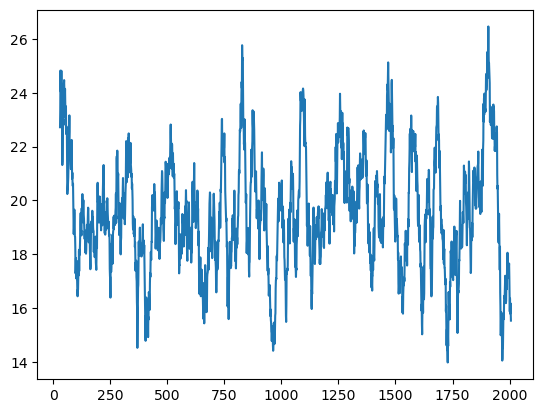

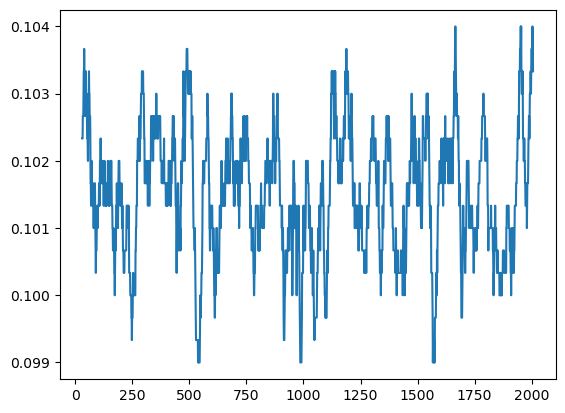

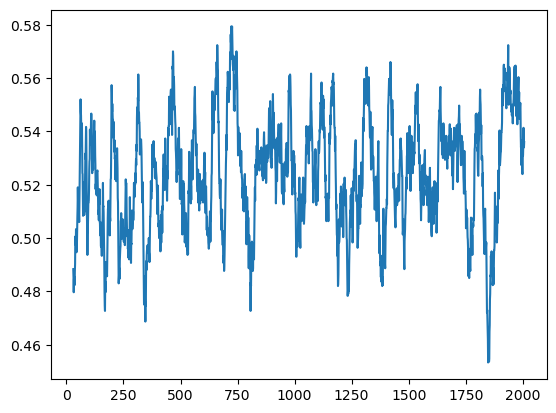

In [8]:
df = pd.read_csv('./run_metrics/mask_ppo_env_nne_qoe_True_obj_False_cw_0.0_qw_0.0_lw_0.0_gw_1.0_sim_Real_acc_0.0.csv.csv', on_bad_lines='skip')
n_smooth = 30
# Plot the 'reward' column
# Calculate moving average with a window size of 5
moving_avg = df['avg_deployment_cost'].rolling(window=n_smooth).mean()
plt.plot(moving_avg[n_smooth:])
plt.show()
# Plot the 'reward' column
moving_avg = df['avg_qoe'].rolling(window=n_smooth).mean()
plt.plot(moving_avg[n_smooth:])
plt.show()
# Plot the 'reward' column
moving_avg = df['gini'].rolling(window=n_smooth).mean()
plt.plot(moving_avg[n_smooth:])
plt.show()

In [21]:
# Define the file path (update this with the actual file path)
file_path = './vec_nne_gym_results.monitor.csv'

# Read the file and skip the first metadata line
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extract only the CSV content (skip metadata line)
csv_content = "\n".join(lines[1:])

# Load the CSV content into a DataFrame
from io import StringIO
data = pd.read_csv(StringIO(csv_content))

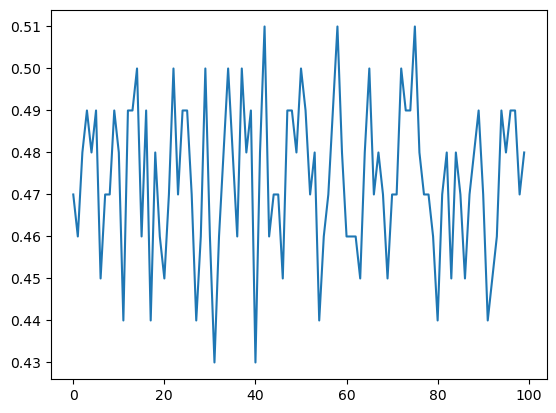

In [23]:
plt.plot(data['qoe'])

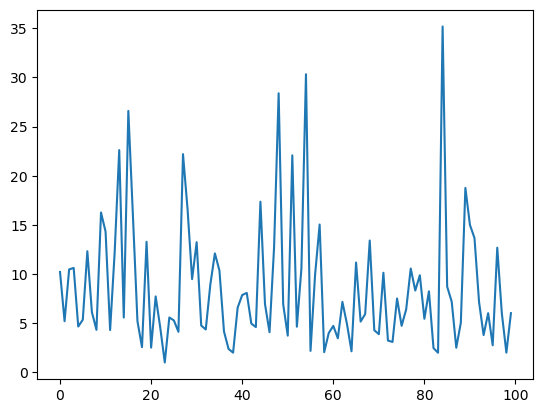

In [25]:
plt.plot(data['avg_deployment_cost'])

In [7]:
df = pd.read_csv('./nne_gym_results.csv', on_bad_lines='skip')
n_smooth = 30
# Plot the 'reward' column
# Calculate moving average with a window size of 5
moving_avg = df['avg_deployment_cost'].rolling(window=n_smooth).mean()
plt.plot(moving_avg[n_smooth:])
plt.show()
# Plot the 'reward' column
moving_avg = df['avg_qoe'].rolling(window=n_smooth).mean()
plt.plot(moving_avg[n_smooth:])
plt.show()
# Plot the 'reward' column
moving_avg = df['gini'].rolling(window=n_smooth).mean()
plt.plot(moving_avg[n_smooth:])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './nne_gym_results.csv'

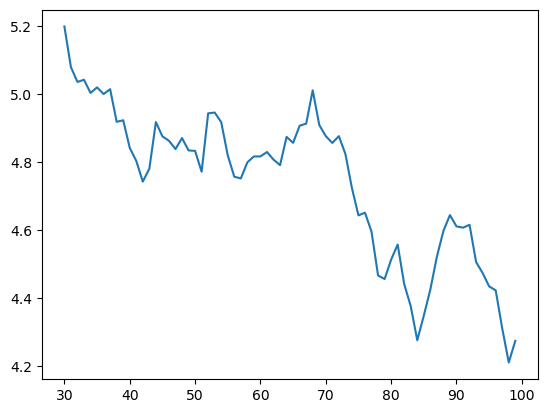

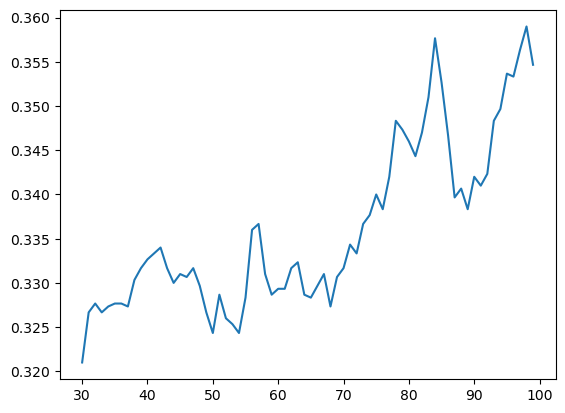

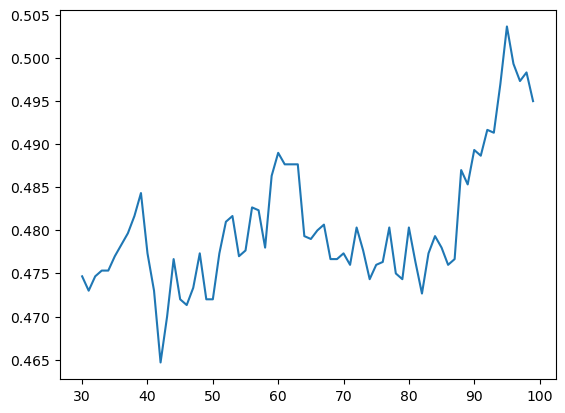

In [56]:
df = pd.read_csv('./nne_gym_results.csv', on_bad_lines='skip')
n_smooth = 30
# Plot the 'reward' column
# Calculate moving average with a window size of 5
moving_avg = df['avg_deployment_cost'].rolling(window=n_smooth).mean()
plt.plot(moving_avg[n_smooth:])
plt.show()
# Plot the 'reward' column
moving_avg = df['avg_qoe'].rolling(window=n_smooth).mean()
plt.plot(moving_avg[n_smooth:])
plt.show()
# Plot the 'reward' column
moving_avg = df['gini'].rolling(window=n_smooth).mean()
plt.plot(moving_avg[n_smooth:])
plt.show()

# Optimize for Cost

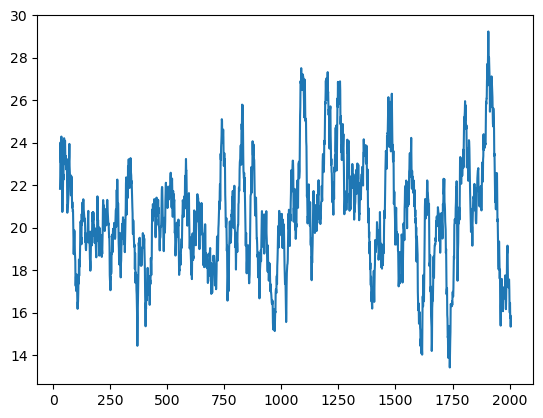

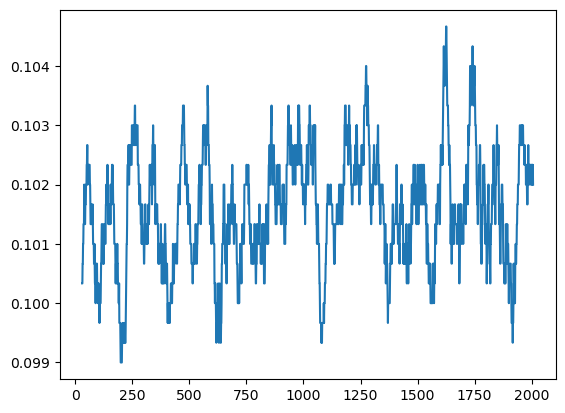

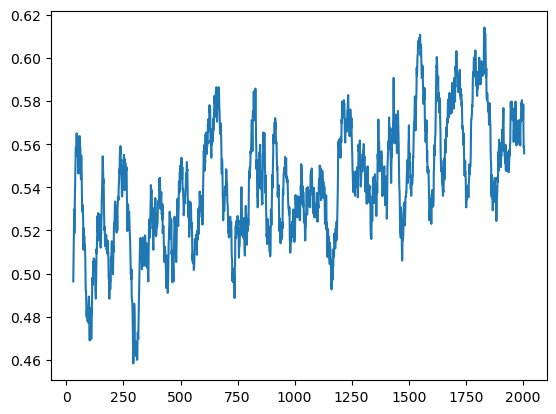

In [108]:
df = pd.read_csv('./run_metrics/mask_ppo_env_nne_qoe_True_obj_False_cw_0.0_qw_1.0_lw_0.0_gw_0.0_sim_Simulation_acc_1.0.csv.csv', on_bad_lines='skip')
n_smooth = 30
# Plot the 'reward' column
# Calculate moving average with a window size of 5
moving_avg = df['avg_deployment_cost'].rolling(window=n_smooth).mean()
plt.plot(moving_avg[n_smooth:])
plt.show()
# Plot the 'reward' column
moving_avg = df['avg_qoe'].rolling(window=n_smooth).mean()
plt.plot(moving_avg[n_smooth:])
plt.show()
# Plot the 'reward' column
moving_avg = df['gini'].rolling(window=n_smooth).mean()
plt.plot(moving_avg[n_smooth:])
plt.show()

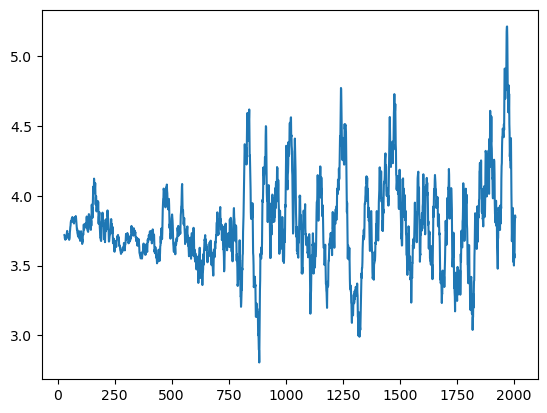

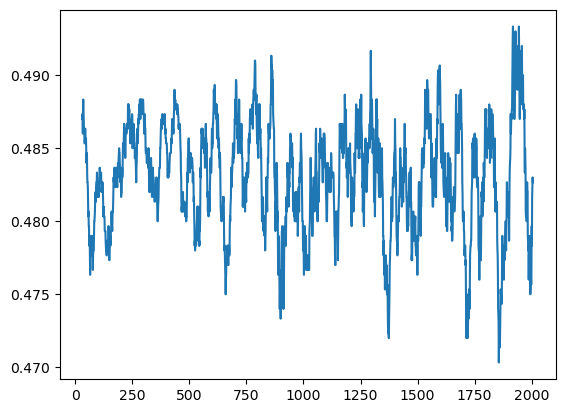

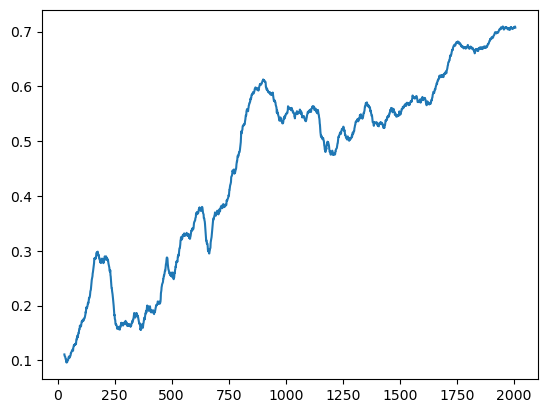

In [40]:
df = pd.read_csv('./nne_gym_results.csv', on_bad_lines='skip')
n_smooth = 30
# Plot the 'reward' column
# Calculate moving average with a window size of 5
moving_avg = df['avg_deployment_cost'].rolling(window=n_smooth).mean()
plt.plot(moving_avg[n_smooth:])
plt.show()
# Plot the 'reward' column
moving_avg = df['avg_qoe'].rolling(window=n_smooth).mean()
plt.plot(moving_avg[n_smooth:])
plt.show()
# Plot the 'reward' column
moving_avg = df['gini'].rolling(window=n_smooth).mean()
plt.plot(moving_avg[n_smooth:])
plt.show()

In [24]:
np.random.rand(20)

array([0.39315113, 0.91108883, 0.70973162, 0.38004987, 0.37050899,
       0.81908108, 0.60312279, 0.65505012, 0.03539394, 0.3468739 ,
       0.85947736, 0.18932992, 0.50472955, 0.60668163, 0.83052904,
       0.85913317, 0.44433976, 0.56051358, 0.30825515, 0.08170265])

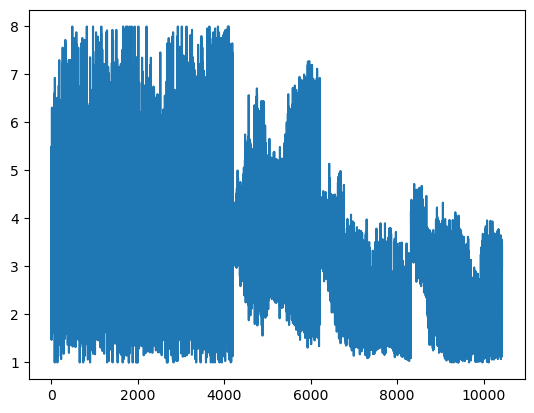

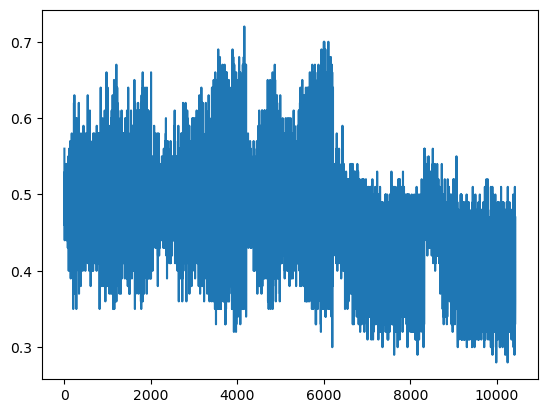

In [12]:
df = pd.read_csv('./nne_gym_results.csv', on_bad_lines='skip')
n_smooth = 1
# Plot the 'reward' column
# Calculate moving average with a window size of 5
moving_avg = df['avg_deployment_cost'].rolling(window=n_smooth).mean()
plt.plot(moving_avg[n_smooth:])
plt.show()
# Plot the 'reward' column
moving_avg = df['avg_qoe'].rolling(window=n_smooth).mean()
plt.plot(moving_avg[n_smooth:])
plt.show()

# Optimize for QOE after changeing rang

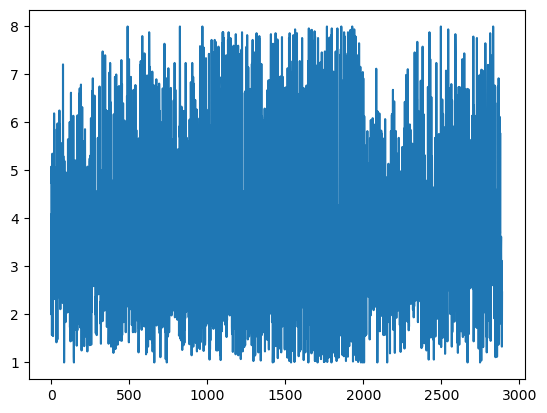

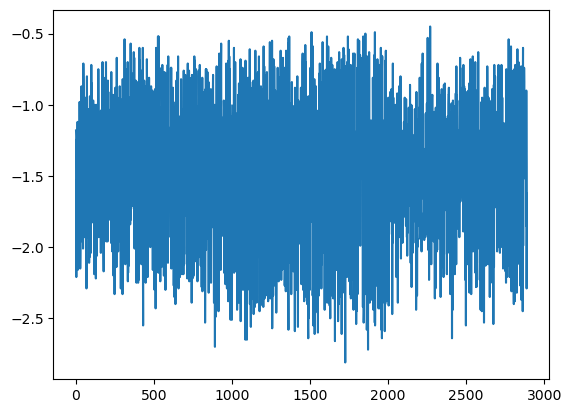

In [40]:
df = pd.read_csv('./nne_gym_results.csv', on_bad_lines='skip')

# Plot the 'reward' column
plt.plot(df['avg_deployment_cost'])
plt.show()
# Plot the 'reward' column
plt.plot(df['avg_qoe'])
plt.show()

# Optimize for QOE

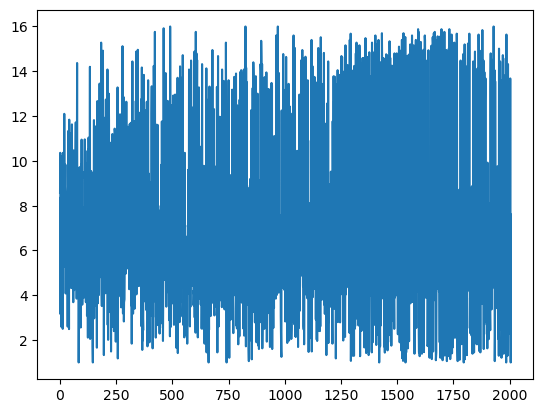

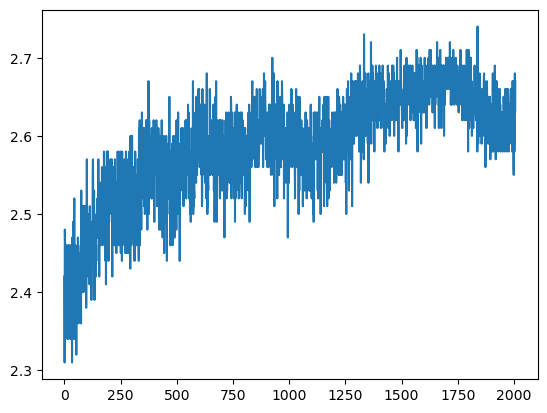

In [81]:
df = pd.read_csv('./nne_gym_results.csv', on_bad_lines='skip')

# Plot the 'reward' column
plt.plot(df['avg_deployment_cost'])
plt.show()
# Plot the 'reward' column
plt.plot(df['avg_qoe'])
plt.show()

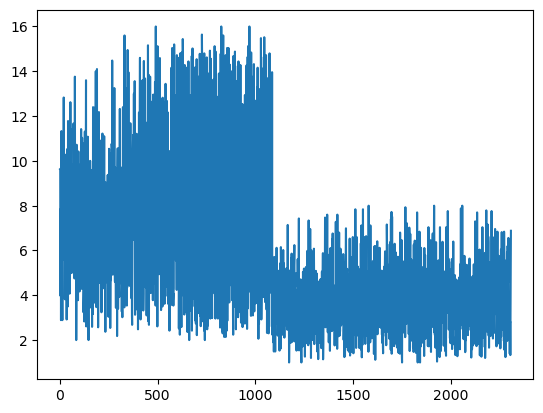

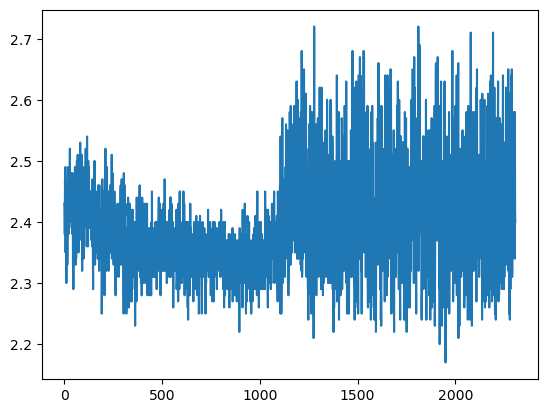

In [123]:
df = pd.read_csv('./nne_gym_results.csv', on_bad_lines='skip')


# Plot the 'reward' column
plt.plot(df['avg_deployment_cost'])
plt.show()
# Plot the 'reward' column
plt.plot(df['avg_qoe'])
plt.show()

In [9]:
variables = [
    "r", "l", "t", "reward_step", "action", "reward", "ep_block_prob", "ep_accepted_requests",
    "avg_deployment_cost", "avg_total_latency", "avg_access_latency", "avg_processing_latency",
    "avg_throuput_in", "avg_packetsize_in", "avg_interarrival_in", "avg_throuput_out",
    "avg_packetsize_out", "avg_interarrival_out", "avg_latency_binary", "avg_jerkiness_binary",
    "avg_sync_binary", "gini", "executionTime"
]
len(variables)

23

In [5]:
df

,1,0.66,0.14,86.0,7.81,22.72,6.89,15.74,0.09,74.98,29.66,2.39,0.06,32.0,24.0,30.0,0.28
0,2,9.68,0.06,94.0,6.38,23.61,6.17,17.36,0.08,73.46,28.97,3.02,0.15,41.0,33.0,20.0,0.29
1,3,-9.46,0.18,82.0,4.00,19.91,4.27,15.56,0.08,41.51,22.84,4.87,0.46,26.0,56.0,0.0,0.36
2,4,-6.55,0.16,84.0,4.42,26.60,4.17,22.36,0.07,43.07,26.30,1.94,0.53,67.0,0.0,17.0,0.36
3,5,-5.90,0.21,79.0,9.16,24.38,7.31,16.99,0.08,81.06,36.18,1.86,0.15,33.0,15.0,31.0,0.35
4,6,-1.36,0.15,85.0,1.98,24.69,2.34,22.28,0.07,66.73,31.80,2.78,0.18,20.0,43.0,22.0,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9462,2003,0.89,0.00,100.0,1.67,121478.82,1.60,121477.22,NaN,NaN,NaN,NaN,0.75,NaN,NaN,NaN,0.12
9463,2004,5.87,0.00,100.0,5.40,122811.79,4.53,122807.26,NaN,NaN,NaN,NaN,0.75,NaN,NaN,NaN,0.12
9464,2005,8.15,0.00,100.0,7.11,120443.01,6.21,120436.80,NaN,NaN,NaN,NaN,0.75,NaN,NaN,NaN,0.12
9465,2006,0.00,0.00,100.0,1.00,121803.38,1.00,121802.38,NaN,NaN,NaN,NaN,0.75,NaN,NaN,NaN,0.11
